In [67]:
# Google Drive is mounted to access the project files in Colab, then pandas is imported for data handling,
# matplotlib for plotting, and Path for cleaner file path management.

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# The base folder path is defined and the five Instacart CSV tables are loaded into separate DataFrames.
# These files use ';' as the delimiter, and low_memory=False helps reduce mixed-type warnings for order_products.

base = Path('/content/drive/MyDrive/Introduction2Python_projects/Pandas')

orders = pd.read_csv(base / "instacart_orders.csv", sep=";")
products = pd.read_csv(base / "products.csv", sep=";")
aisles = pd.read_csv(base / "aisles.csv", sep=";")
departments = pd.read_csv(base / "departments.csv", sep=";")
order_products = pd.read_csv(base / "order_products.csv", sep=";", low_memory=False)

##Check for duplicates to avoid counting the same record twice,remove full-row duplicates if found.

### `orders` data frame

In [69]:
# Count fully duplicated rows in 'orders' before cleaning.

orders.duplicated().sum()

np.int64(15)

In [70]:
#The output np.int64(15) means there are 15 fully duplicated rows in the orders table.

In [71]:
orders.describe(include="all")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [72]:
# orders.describe(include="all") summarizes each column (count, mean, min/max, quartiles).
# Here, days_since_prior_order has a lower count (450,148 vs 478,967), which indicates missing values in that column.

In [73]:
# Check for all orders placed Wednesday at 2:00 AM
orders[(orders["order_dow"] == 3) & (orders["order_hour_of_day"] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [74]:
# This filter returns all orders where order_dow is 3 (Wednesday) and order_hour_of_day is 2 (2:00 AM).
# The output table lists only the orders that match both conditions.

In [75]:
# Remove fully duplicated rows so each order record is counted once.
orders = orders.drop_duplicates()

In [76]:
# Re-check to confirm there are no duplicated rows left after cleaning.
orders.duplicated().sum()

np.int64(0)

In [77]:
# The result is 0, which confirms that no duplicate rows or duplicate order_id values remain after cleaning.

In [78]:
# Check whether order_id values are unique; duplicate IDs could cause merge/count issues later.
orders["order_id"].duplicated().sum()

np.int64(0)

In [79]:
# The result is 0, which confirms that no duplicate rows or duplicate order_id values remain after cleaning.

### `products` data frame

In [80]:
# Check whether the products table contains any fully duplicated rows.
products.duplicated().sum()

np.int64(0)

In [81]:
# The result is 0, meaning no fully duplicated rows were found.

In [82]:
# Check whether any product_id values are duplicated.
products["product_id"].duplicated().sum()

np.int64(0)

In [83]:
# The result is 0, confirming that all product IDs are unique.

In [84]:
# Check for duplicate product names after converting them to lowercase to avoid case-sensitive differences.
products["product_name"].str.lower().duplicated().sum()

np.int64(1361)

In [85]:
# 1361 duplicated product names were found when compared case-insensitively.

In [86]:
# Check for duplicated product names while excluding missing values.
products.loc[~products["product_name"].isna(), "product_name"].str.lower().duplicated().sum()

np.int64(104)

In [87]:
# 104 duplicated names remain after excluding missing values; these were not removed since names may repeat across different product IDs.

### `departments` data frame

In [88]:
# This checks how many fully duplicated rows exist in the departments table.
departments.duplicated().sum()

np.int64(0)

In [89]:
# The result is 0, meaning no duplicate rows were found.

In [90]:
# This checks whether any department_id values are repeated.
departments["department_id"].duplicated().sum()

np.int64(0)

In [91]:
# The result is 0, confirming that all department IDs are unique.

### `aisles` data frame

In [92]:
# This checks how many fully duplicated rows exist in the aisles table.

aisles.duplicated().sum()

np.int64(0)

In [93]:
# The result is 0, meaning no duplicate rows were found.

In [94]:
# This checks whether any aisle_id values are repeated.
aisles["aisle_id"].duplicated().sum()

np.int64(0)

In [95]:
# The result is 0, confirming that all aisle IDs are unique.

### `order_products` data frame

In [96]:
# This checks how many fully duplicated rows exist in the order_products table.
order_products.duplicated().sum()

np.int64(0)

In [97]:
# The result is 0, meaning no fully duplicated rows were found.

In [98]:
# This checks whether the same product appears more than once within the same order.
order_products.duplicated(subset=["order_id", "product_id"]).sum()

np.int64(0)

In [99]:
# The result is 0, confirming that no duplicate order–product pairs exist.

## Missing Value Assessment and Treatment


### `products` data frame

In [100]:
# This checks whether all missing product_name values are linked to aisle_id = 100.
missing_names = products[products["product_name"].isna()]
(missing_names["aisle_id"] == 100).all()

np.True_

In [101]:
# The result is True, meaning all missing product names belong to aisle 100.

In [102]:
# This checks whether all missing product_name values are associated with department_id = 21.
(missing_names["department_id"] == 21).all()

np.True_

In [103]:
# The result is True, confirming that all missing names belong to department 21.

In [104]:
# This retrieves the department name for department_id = 21.
departments.loc[departments["department_id"] == 21]

,department_id,department
20,21,missing


In [105]:
# The department is labeled as "missing", indicating these products belong to a placeholder category.

In [106]:
# Missing product names are replaced with "Unknown" to maintain consistency and avoid null values during analysis.
products["product_name"] = products["product_name"].fillna("Unknown")

### `orders` data frame

In [107]:
# This checks whether there are missing days_since_prior_order values for orders that are not a customer’s first order.
orders[(orders["order_number"] != 1) & (orders["days_since_prior_order"].isna())]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [108]:
# The result is empty, meaning missing values occur only for first orders.

In [109]:
# Missing values are replaced with 0 since first orders have no prior purchase, and the column is converted to integer for consistency.
orders["days_since_prior_order"] = orders["days_since_prior_order"].fillna(0).astype("int64")

### `order_products` data frame

In [110]:
# This checks the minimum and maximum values in the add_to_cart_order column.
order_products["add_to_cart_order"].min(), order_products["add_to_cart_order"].max()

(1.0, 64.0)

In [111]:
# The values range from 1 to 64, indicating that products are normally added in positions 1 through 64.

In [112]:
# This extracts all order_id values that contain at least one missing add_to_cart_order.
missing_add = order_products[order_products["add_to_cart_order"].isna()]["order_id"].unique()
missing_add

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [113]:
# The output is an array of order IDs where the cart position is missing.

In [114]:
# This checks whether all orders with missing values contain more than 64 products.
order_sizes = order_products.groupby("order_id")["product_id"].count()
(order_sizes[missing_add] > 64).all()

np.True_

In [115]:
# The result is True, meaning all affected orders exceed 64 products.

In [116]:
# Missing cart positions are replaced with 999 as a marker value, and the column is converted to integer for consistency.
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999).astype("int64")

# Data Analysis

### 1.1 The values in the order_hour_of_day and order_dow columns were checked to verify whether order_hour_of_day falls within the 0–23 range and order_dow falls within the 0–6 range.

In [117]:
# This checks the minimum and maximum values in the 'order_hour_of_day' column
# to determine whether the order hours fall within the expected 0–23 range.
orders["order_hour_of_day"].min(), orders["order_hour_of_day"].max()

(0, 23)

In [118]:
# The result shows that the minimum value is 0 and the maximum value is 23, confirming that the order hours fall within the valid 24-hour time range.

In [119]:
# This checks the minimum and maximum values in the 'order_dow' column
# to determine whether the day-of-week values fall within the expected 0–6 range.
orders["order_dow"].min(), orders["order_dow"].max()

(0, 6)

In [120]:
# The output indicates that the minimum value is 0 and the maximum value is 6, meaning that the day-of-week values are correctly limited to the expected range.

### 1.2 The distribution of grocery orders across different hours of the day was analyzed to identify peak shopping periods and understand customer purchasing behavior throughout the day.

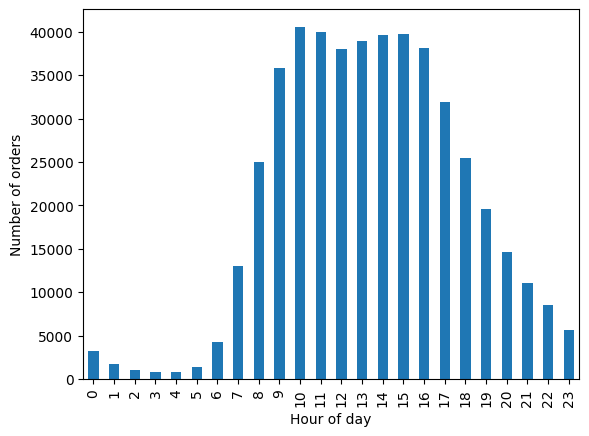

In [121]:
# This calculates the number of orders for each hour of the day
# and visualizes the distribution using a bar chart.

orders["order_hour_of_day"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Hour of day")
plt.ylabel("Number of orders")
plt.show()

In [122]:
# The bar chart illustrates the distribution of grocery orders across different hours of the day.
# It can be observed that order activity is very low during late night and early morning hours (around 0–5 AM).
# Order frequency begins to increase significantly after 7 AM and reaches its peak between approximately 10 AM and 4 PM.
# After 5 PM, the number of orders gradually decreases toward the late evening hours.
# This indicates that most customers prefer to shop during daytime hours, particularly in the late morning and early afternoon.

### 1.3 The distribution of grocery orders across the days of the week was analyzed to determine which days have the highest and lowest shopping activity.

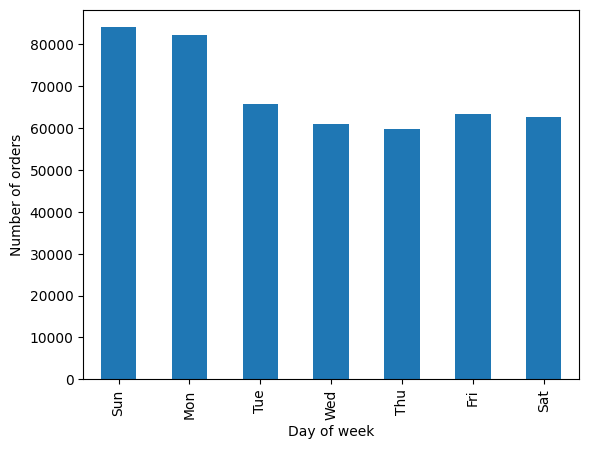

In [123]:
# This code processes and analyzes the distribution of grocery orders by day of the week.
# It converts numerical day values into weekday names, calculates the total number of
# orders for each day, arranges them in the correct chronological order,
# and visualizes the results using a bar chart.

day_map = {0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"}

dow_counts = orders["order_dow"].value_counts().sort_index()

dow_counts.index = dow_counts.index.map(day_map)

dow_counts = dow_counts.reindex(["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])

dow_counts.plot(kind="bar")
plt.xlabel("Day of week")
plt.ylabel("Number of orders")
plt.show()

In [124]:
# The bar chart shows the distribution of grocery orders across the days of the week.
# It can be observed that order activity is highest on Sunday and Monday.
# After Monday, the number of orders gradually decreases, reaching lower levels midweek (especially Wednesday and Thursday).
# A slight increase is observed again toward Friday and Saturday.
# This indicates that customers tend to shop more at the beginning of the week, particularly on Sunday and Monday.

### 1.4 The time intervals between consecutive orders were analyzed to determine how long customers typically wait before placing another order.

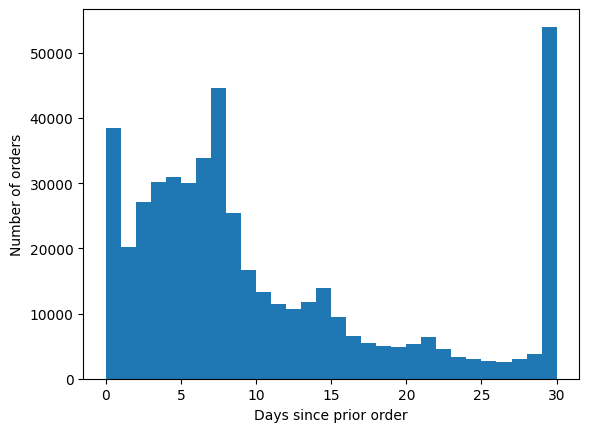

In [125]:
# This code analyzes the distribution of the time interval between consecutive orders
# by creating a histogram of the 'days_since_prior_order' column.
# It visualizes how many days customers typically wait before placing another order.

orders["days_since_prior_order"].plot(kind="hist", bins=30)
plt.xlabel("Days since prior order")
plt.ylabel("Number of orders")
plt.show()

In [126]:
# The histogram shows the distribution of the number of days customers wait before placing a new order.
# A high concentration of orders appears within the first 7–10 days, indicating that many customers reorder within a week.
# There is also a noticeable peak at 30 days, suggesting that a significant number of customers follow a monthly purchasing pattern.
# Overall, most reorders occur within the first two weeks after the previous purchase.

### 2.1 The distribution of order_hour_of_day was analyzed separately for Wednesdays and Saturdays to determine whether differences exist in hourly ordering patterns between these two days. Histograms were generated for both days to visually compare customer activity across different hours.

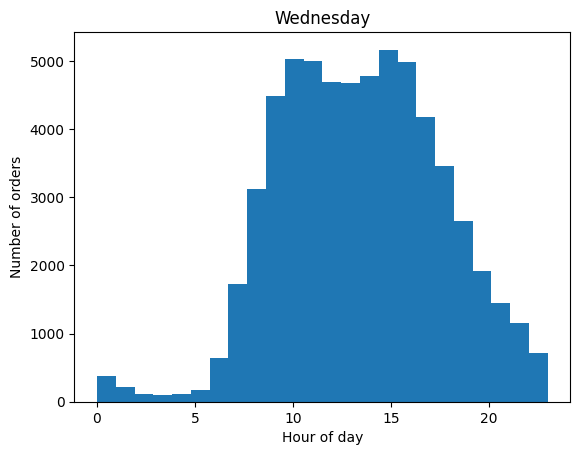

In [127]:
# This code filters the dataset to include only orders placed on Wednesday
# and visualizes the distribution of order hours using a histogram.

orders[orders["order_dow"] == 3]["order_hour_of_day"].plot(kind="hist", bins=24)
plt.xlabel("Hour of day")
plt.ylabel("Number of orders")
plt.title("Wednesday")
plt.show()

In [128]:
# The histogram shows that order activity on Wednesday is concentrated during daytime hours.
# The number of orders begins to increase after early morning, peaks roughly between 10 AM and 3 PM, and then gradually declines toward the evening.
# Very low activity is observed during late night and early morning hours.

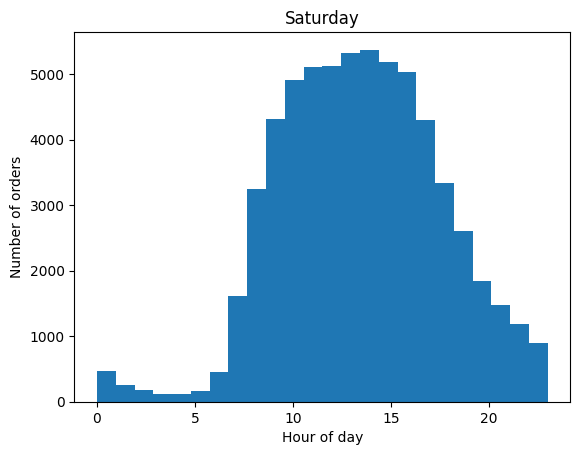

In [129]:
# This code filters the dataset to include only orders placed on Saturday
# and visualizes the distribution of order hours using a histogram.

orders[orders["order_dow"] == 6]["order_hour_of_day"].plot(kind="hist", bins=24)
plt.xlabel("Hour of day")
plt.ylabel("Number of orders")
plt.title("Saturday")
plt.show()

In [130]:
# The histograms for Wednesday and Saturday show generally similar patterns, with order activity concentrated during daytime hours.
# In both cases, orders increase after early morning and peak between approximately 10 AM and 3 PM.
# However, Saturday demonstrates slightly higher overall order volume during peak hours compared to Wednesday.
# Additionally, weekend ordering activity appears to extend slightly later into the afternoon and evening, suggesting more flexible shopping behavior on Saturdays.
# Overall, while the general hourly distribution pattern is similar, Saturday exhibits marginally higher and more sustained activity levels.

### 2.2 The distribution of the number of orders per customer was analyzed to understand customer purchasing frequency and identify patterns in repeat ordering behavior.

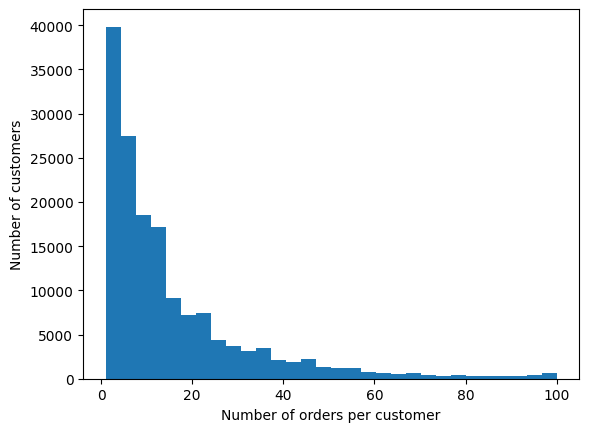

In [131]:
# This code calculates the total number of orders per customer by grouping
# the dataset by user_id and selecting the maximum order number for each user.
# It then visualizes the distribution of orders per customer using a histogram.

orders_per_customer = orders.groupby("user_id")["order_number"].max()

orders_per_customer.plot(kind="hist", bins=30)
plt.xlabel("Number of orders per customer")
plt.ylabel("Number of customers")
plt.show()

In [132]:
# The histogram shows that most customers place a relatively small number of orders.
# A large concentration of users falls within the lower order ranges (approximately 1–20 orders).
# As the number of orders increases, the number of customers decreases significantly, indicating a right-skewed distribution.
# Only a small proportion of customers place a very high number of orders (e.g., 50 or more), suggesting the presence of highly loyal or frequent buyers.
# Overall, the distribution demonstrates that while most customers order occasionally, a smaller segment contributes to repeated and frequent purchases.

### 2.3 The top 20 most popular products were identified based on the total number of times they were ordered. Both the product IDs and product names were displayed to determine which items are most frequently purchased.

In [133]:
# This code identifies the top 20 most frequently ordered products
# by counting occurrences of each product_id in the order_products table.
# It then renames the columns for clarity and merges the result with the
# products table to retrieve corresponding product names.

top20 = (order_products["product_id"].value_counts().head(20).reset_index())

top20.columns = ["product_id", "count"]

top20 = top20.merge(products[["product_id", "product_name"]], on="product_id", how="left")
top20

,product_id,count,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


In [134]:
# The results show that fresh produce dominates the list of the most popular products.
# Bananas (product_id: 24852) rank first with 66,050 orders, followed by Bag of Organic Bananas and Organic Strawberries.
# A significant proportion of the top 20 products consists of organic fruits and vegetables, such as Organic Baby Spinach, Organic Hass Avocado, Organic Whole Milk, and Organic Blueberries.
# This indicates a strong customer preference for fresh and organic products.
# Overall, the ranking suggests that essential grocery staples—particularly fruits and vegetables—are the most frequently purchased items.

### 3.1 The number of items purchased per order was analyzed to determine typical basket size and to examine the overall distribution of items within individual orders.

In [135]:
# This code calculates the number of items in each order by grouping
# the dataset by order_id and counting the number of products per order.
# It then generates descriptive statistics to summarize the distribution.

items_per_order = order_products.groupby("order_id")["product_id"].count()

items_per_order.describe().round(2)


,product_id
count,450046.00
mean,10.10
std,7.54
min,1.00
25%,5.00
50%,8.00
75%,14.00
max,127.00


In [136]:
# The descriptive statistics indicate that customers purchase an average of 10.10 items per order, with a median of 8 items,
# suggesting that a typical order contains between 8 and 10 products.
# The interquartile range (5 to 14 items) shows that 50% of orders include between 5 and 14 products.
# The minimum number of items in an order is 1, while the maximum reaches 127 items, indicating the presence of some unusually large orders.
# The relatively high standard deviation (7.54) suggests noticeable variability in basket sizes,
# meaning customer purchasing behavior differs considerably across orders.

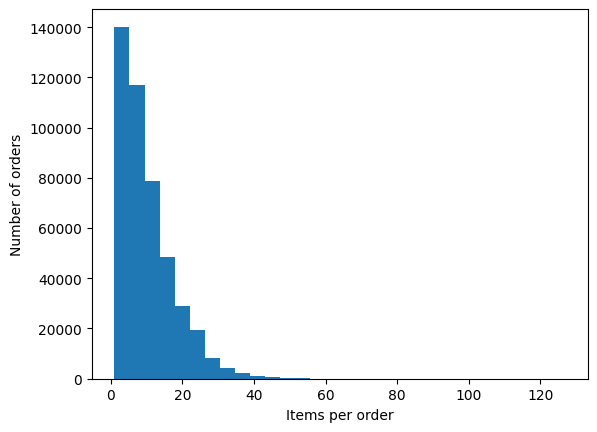

In [137]:
# This code visualizes the distribution of the number of items per order
# using a histogram to better understand basket size patterns.

items_per_order.plot(kind="hist", bins=30)
plt.xlabel("Items per order")
plt.ylabel("Number of orders")
plt.show()

In [138]:
# The histogram shows a right-skewed distribution, where most orders contain a relatively small number of items.
# The highest concentration of orders falls within the range of approximately 1 to 15 items.
# As the number of items increases, the frequency of orders decreases significantly.
# Only a small number of orders contain more than 40 items, and very few exceed 60 items.
# This pattern suggests that typical customer behavior involves purchasing a moderate number of products per order, while large basket sizes are relatively uncommon.

### 3.2 The top 20 most frequently reordered products were identified to determine which items customers tend to purchase repeatedly. Both product IDs and product names were displayed to clearly present the most commonly reordered items.

In [139]:
# This code filters the dataset to include only reordered items (reordered == 1),
# counts how many times each product was reordered, selects the top 20 products,
# and merges the results with the products table to retrieve product names.

top20_reordered = (order_products[order_products["reordered"] == 1]["product_id"].value_counts().head(20).reset_index())

top20_reordered.columns = ["product_id", "reorder_count"]

top20_reordered = top20_reordered.merge(products[["product_id", "product_name"]],on="product_id",how="left")

top20_reordered

,product_id,reorder_count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


In [140]:
# The results show that the most frequently reordered items largely overlap with the overall most popular products.
# Bananas rank first with 55,763 reorders, followed by Bag of Organic Bananas and Organic Strawberries.
# Fresh produce and organic products dominate the list, indicating strong customer loyalty toward these items.
# The high reorder counts suggest that these products are staple goods that customers purchase regularly.
# Overall, the findings demonstrate consistent repurchasing behavior, particularly for fruits, vegetables, and everyday essentials.

### 3.3 The proportion of reorders for each product was calculated to determine the extent to which individual products are repeatedly purchased. This analysis helps measure product-level customer loyalty and repurchasing behavior.

In [141]:
# This code calculates the reorder proportion for each product by grouping
# the dataset by product_id and computing the mean of the 'reordered' column.
# Since 'reordered' is binary (0 or 1), the mean represents the proportion of reorders.
# The result is then merged with the products table to include product names,
# and sorted in descending order to identify products with the highest reorder rates.

reorder_prop = (order_products.groupby("product_id")["reordered"].mean().reset_index().rename(columns={"reordered": "reorder_proportion"}))

reorder_prop = reorder_prop.merge(products[["product_id", "product_name"]],on="product_id",how="left")

reorder_prop.sort_values("reorder_proportion", ascending=False).head(20)

,product_id,reorder_proportion,product_name
28108,30644,1.0,Organic French Roast
7340,8054,1.0,Bissli Smokey Wheat Snacks
28114,30650,1.0,Mushroom Lover's Veggie Burgers
41002,44747,1.0,Frozen Organic Blackberries
40998,44743,1.0,Real Zero Cola
32921,35897,1.0,Ham Hock
32861,35834,1.0,Bulgarian Organic Yogurt
2684,2939,1.0,Cheddar Crunchin' Crackers
20357,22209,1.0,Temples Earl Gray Strong Tea
20361,22213,1.0,2% Reduced Fat Chocolate Milk


In [142]:
# The results show that several products have a reorder proportion of 1.0, meaning that every recorded purchase of these products was marked as a reorder.
# This indicates extremely strong repeat purchasing behavior for these items.
# However, such values may also suggest that these products were purchased by a limited number of customers but reordered consistently.
# Therefore, while a reorder proportion of 1.0 reflects perfect repeat behavior within the observed data, it does not necessarily imply high overall popularity.
# Overall, the analysis highlights products with the strongest customer retention at the product level.

### 3.4 The proportion of reordered products was calculated for each customer to evaluate individual repurchasing behavior and measure customer-level loyalty patterns.

In [143]:
# This code merges the order_products table with the orders table to associate
# each product with its corresponding user_id. It then groups the data by user_id
# and calculates the mean of the 'reordered' column to determine the reorder
# proportion for each customer. Finally, descriptive statistics are generated
# to summarize the distribution of customer-level reorder proportions.

user_reorder_prop = (order_products.merge(orders[["order_id", "user_id"]], on="order_id", how="left").groupby("user_id")["reordered"].mean())

user_reorder_prop.describe().round(2)

,reordered
count,149626.00
mean,0.49
std,0.29
min,0.00
25%,0.27
50%,0.50
75%,0.72
max,1.00


In [144]:
# The descriptive statistics indicate that, on average, approximately 49% of the products ordered by a customer are reorders.
# The median value is 0.50, meaning that for a typical customer, about half of their purchased products are previously ordered items.
# The interquartile range (0.27–0.72) shows substantial variation in repurchasing behavior among customers. Some customers rarely reorder products (minimum = 0.00),
# while others reorder all of their products (maximum = 1.00).
# The relatively high standard deviation (0.29) suggests considerable diversity in customer loyalty and repeat purchasing patterns.

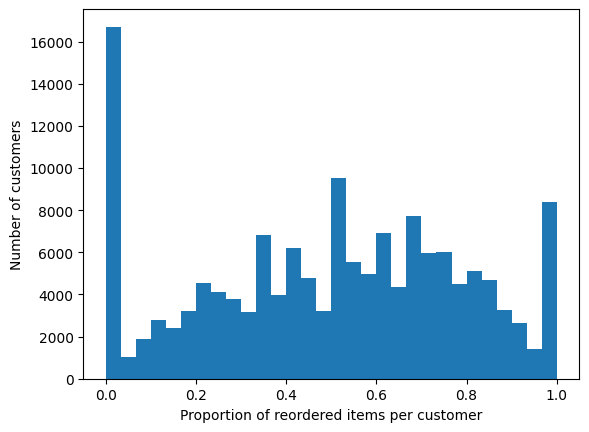

In [145]:
# This code visualizes the distribution of reorder proportions per customer
# using a histogram to better understand variations in customer repurchasing behavior.

user_reorder_prop.plot(kind="hist", bins=30)
plt.xlabel("Proportion of reordered items per customer")
plt.ylabel("Number of customers")
plt.show()

In [146]:
# The histogram reveals a polarized distribution of reorder proportions across customers.
# A significant spike appears at 0, indicating that a considerable number of customers never reorder products and primarily purchase new items.
# At the same time, there is noticeable density across mid-range values (approximately 0.3–0.8), suggesting that many customers reorder a moderate portion of their products. Additionally, another visible concentration near 1.0 indicates that some customers almost exclusively reorder previously purchased items.
# This pattern suggests the presence of distinct customer segments:
# Customers who mostly explore new products (low reorder proportion),
# Customers with balanced purchasing behavior (moderate proportion),
# Highly loyal customers who consistently reorder the same products (high proportion).
# Overall, the distribution demonstrates substantial heterogeneity in customer purchasing behavior.

### 3.5 The top 20 products that are most frequently added first to shopping carts were identified to determine which items customers tend to prioritize at the beginning of their orders.

In [147]:
# This code filters the dataset to include only products that were added
# to the cart first (add_to_cart_order == 1). It then counts how many times
# each product appears in the first position, selects the top 20 products,
# and merges the result with the products table to retrieve product names.

top20_first = (order_products[order_products["add_to_cart_order"] == 1]["product_id"].value_counts().head(20).reset_index())

top20_first.columns = ["product_id", "first_in_cart_count"]

top20_first = top20_first.merge(products[["product_id", "product_name"]],on="product_id",how="left")

top20_first

,product_id,first_in_cart_count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


In [ ]:
# The results indicate that staple grocery items are most frequently added to carts first.
# Bananas rank first, followed by Bag of Organic Bananas and Organic Whole Milk.
# Fresh produce and dairy products dominate the list, suggesting that customers often begin their shopping process with essential and commonly purchased items.
# This behavior may reflect habitual purchasing patterns, where customers prioritize frequently consumed goods.
# Overall, the findings suggest that fruits, dairy products, and everyday essentials are typically the starting point of customer shopping sessions.